In [20]:
import numpy as np

from utils.utils import load_model
import scikitplot as skplt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocessing
from utils import constants

In [21]:
class_names = ["basal","melanoma","squamous","misc"]
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(range(len(class_names)),class_names))
id_name_map = dict(zip(class_names,range(len(class_names))))
print(id_name_map)

{'basal': 0, 'melanoma': 1, 'misc': 2, 'squamous': 3}


In [22]:
def predict_images(model, generator):
    predictions = model.predict(generator)
    filenames = generator.filenames
    true_labels = []
    predicted_labels = []
    true_predictions = []
    true_pos = 0
    neg = 0
    temp = np.zeros(4)
    for (prediction, file) in zip(predictions, filenames):
        label = np.argmax(prediction, axis = -1)
        true_label = file.split('/')[0]
        true_labels.append(true_label)
        predicted_labels.append(name_id_map[label])
        temp[label] = 1
        true_predictions.append(temp)
        temp = np.zeros(4)
        if name_id_map[label] == true_label:
            true_pos += 1        
        else:
            neg += 1
    return true_pos, neg, predictions, true_labels, predicted_labels, true_predictions

# VGG16

In [4]:
vgg = load_model('VGG16.h5')

2022-11-25 10:19:30.840612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-25 10:19:30.905855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-25 10:19:30.906618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-25 10:19:30.908124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [5]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_generator = test_datagen.flow_from_directory(
                    constants.TEST_DIRECTORY,
                    target_size=(224,224),
                    batch_size=1,
                    class_mode='categorical',
                    shuffle = False)   

Found 742 images belonging to 4 classes.


In [6]:
true_pos, neg, predictions, true_labels, predicted_labels, true_predictions = predict_images(vgg, test_generator)

2022-11-25 10:19:39.768611: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-25 10:19:41.758522: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-25 10:19:42.136703: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-25 10:19:42.138039: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-25 10:19:42.288623: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

  3/742 [..............................] - ETA: 23s    

2022-11-25 10:19:42.621613: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


742/742 [==============================] - 24s 23ms/step


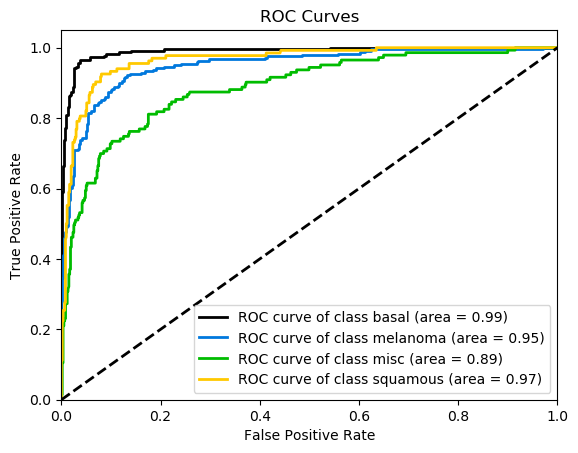

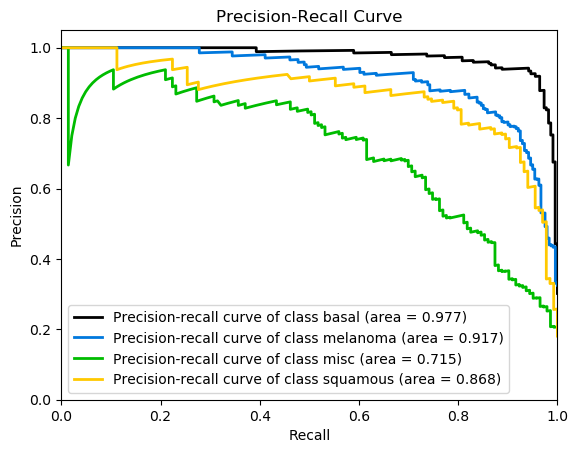

In [7]:
y_train = np.array([id_name_map[item] for item in true_labels])
skplt.metrics.plot_roc(true_labels, predictions, plot_micro= False, plot_macro=False)
skplt.metrics.plot_precision_recall(true_labels, predictions, plot_micro=False)

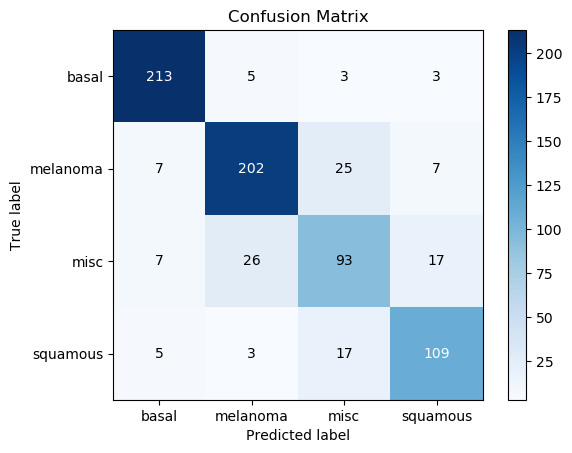

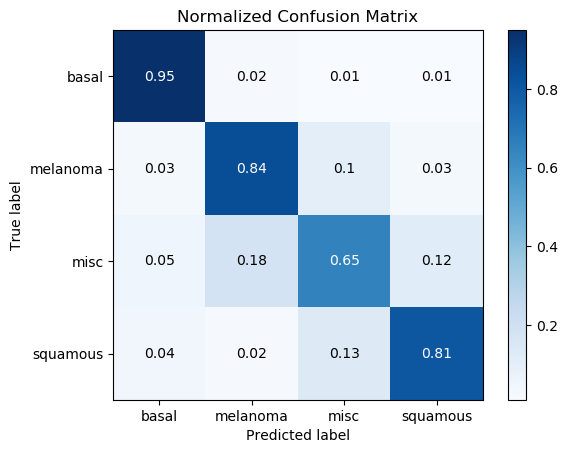

In [8]:
skplt.metrics.plot_confusion_matrix(true_labels, predicted_labels)
skplt.metrics.plot_confusion_matrix(true_labels, predicted_labels, normalize=True)

# ResNet

In [23]:
resnet = load_model('ResNet.h5')

In [24]:
test_datagen = ImageDataGenerator(preprocessing_function = resnet_preprocessing)
test_generator = test_datagen.flow_from_directory(
                    constants.TEST_DIRECTORY,
                    target_size=(224,224),
                    batch_size=1,
                    class_mode='categorical',
                    shuffle = False)   

Found 742 images belonging to 4 classes.


In [25]:
true_pos, neg, predictions, true_labels, predicted_labels, true_predictions = predict_images(resnet, test_generator)

742/742 [==============================] - 17s 22ms/step


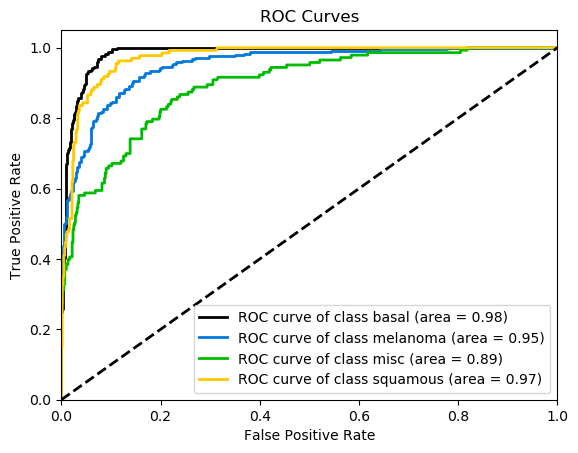

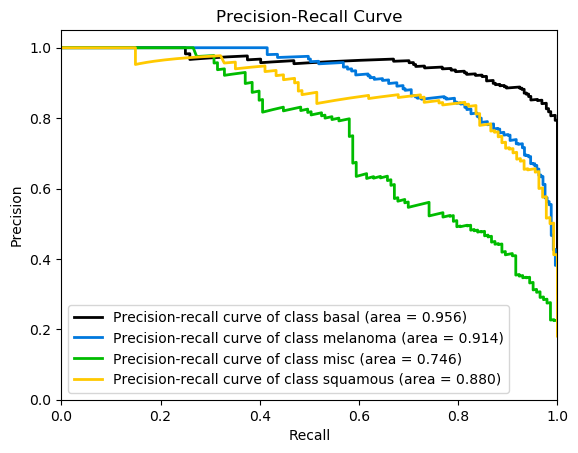

In [26]:
y_train = np.array([id_name_map[item] for item in true_labels])
skplt.metrics.plot_roc(true_labels, predictions, plot_micro= False, plot_macro=False)
skplt.metrics.plot_precision_recall(true_labels, predictions, plot_micro=False)

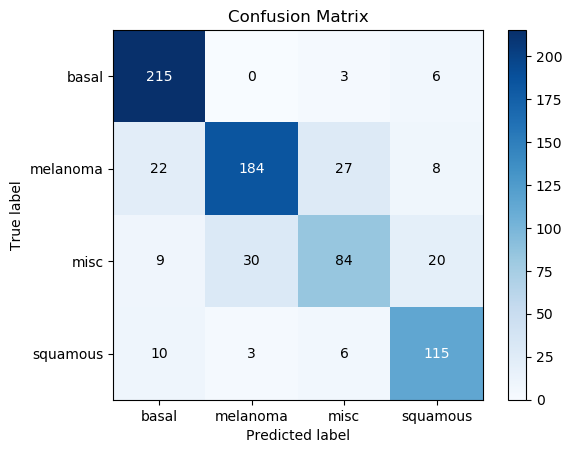

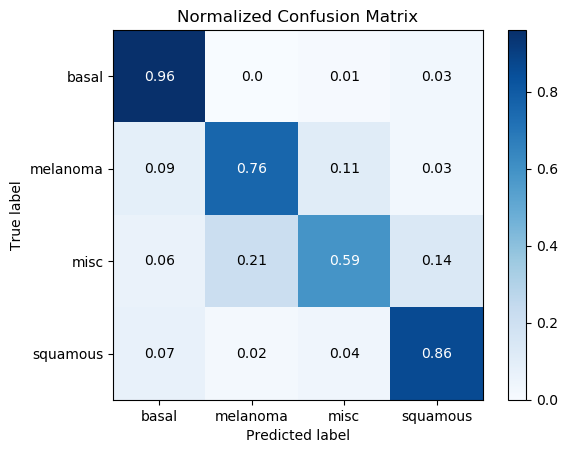

In [27]:
skplt.metrics.plot_confusion_matrix(true_labels, predicted_labels)
skplt.metrics.plot_confusion_matrix(true_labels, predicted_labels, normalize=True)

# Efficient Net

In [28]:
efficient = load_model('EfficientNet.h5')

In [29]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
                    constants.TEST_DIRECTORY,
                    target_size=(224,224),
                    batch_size=1,
                    class_mode='categorical',
                    shuffle = False)   

Found 742 images belonging to 4 classes.


In [30]:
true_pos, neg, predictions, true_labels, predicted_labels, true_predictions = predict_images(efficient, test_generator)

742/742 [==============================] - 16s 20ms/step


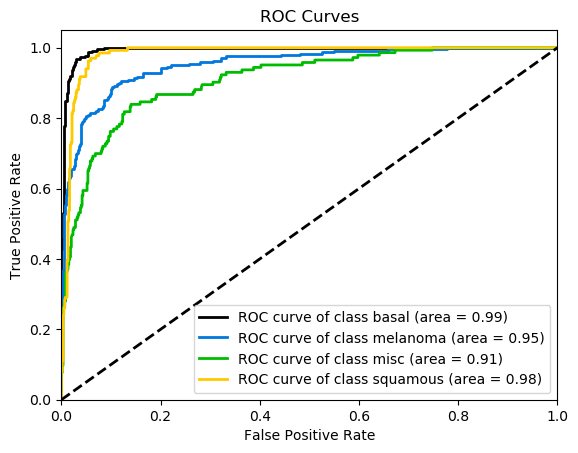

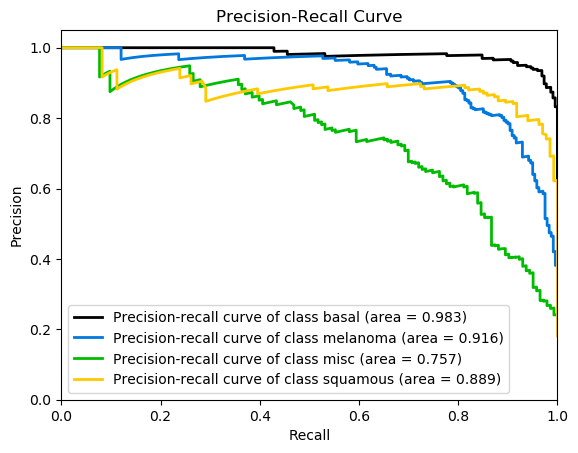

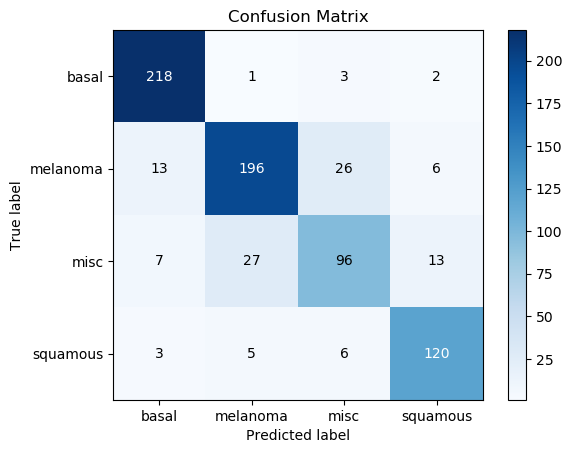

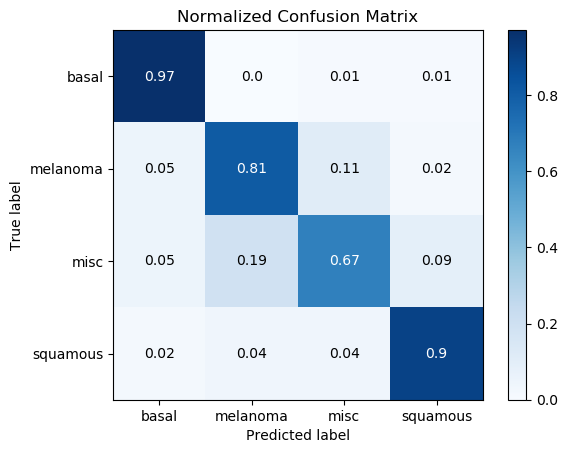

In [32]:
y_train = np.array([id_name_map[item] for item in true_labels])
skplt.metrics.plot_roc(true_labels, predictions, plot_micro= False, plot_macro=False)
skplt.metrics.plot_precision_recall(true_labels, predictions, plot_micro=False)
skplt.metrics.plot_confusion_matrix(true_labels, predicted_labels)
skplt.metrics.plot_confusion_matrix(true_labels, predicted_labels, normalize=True)